In [ ]:
!pip install researchpy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
from statistics import mean, stdev
from pylab import rcParams


sns.set()
plt.set_cmap('tab10')

<Figure size 432x288 with 0 Axes>

In [ ]:
sklearn_results = pd.read_csv('./drive/MyDrive/compsci/sklearn_results.csv')
cnn_results = pd.read_csv('./drive/MyDrive/compsci/cnn_results.csv')
cnn_results = cnn_results.transpose()
lstm_results = pd.read_csv('./drive/MyDrive/compsci/lstm_results.csv')
lstm_results = lstm_results.transpose()

crossval_results = pd.read_csv('./drive/MyDrive/compsci/metric_results/crossval_results.csv')

In [ ]:
sklearn_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']
cnn_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']
lstm_results.columns = ['Model','Accuracy','Precision','Recall','F1score','Conf Matrice']

crossval_results.columns = ['Model','Acc_Mean','Acc_Std','Pre_Mean','Pre_Std','Rec_Mean','Rec_Std','F1_Mean','F1_Std']

In [ ]:
frames = [sklearn_results,lstm_results,cnn_results]
all_results = pd.concat(frames, ignore_index=True)
all_results = all_results.drop(columns=['Conf Matrice'])
print(all_results)
print('')

all_cv_results = crossval_results
print(all_cv_results)

   Model Accuracy Precision Recall F1score
0    GBC    0.908     0.953  0.908   0.923
1    ADA    0.277     0.807  0.277    0.35
2    RFC    0.903     0.949  0.903   0.919
3     NB    0.409     0.842  0.409   0.489
4  NNMLP    0.945     0.967  0.945   0.952
5    SVC    0.941     0.969  0.941   0.951
6   LSTM    0.926     0.965  0.926    0.94
7    CNN    0.954     0.972  0.954    0.96

   Model  Acc_Mean  Acc_Std  Pre_Mean  ...  Rec_Mean  Rec_Std  F1_Mean  F1_Std
0    ADA     0.350    0.169     0.342  ...     0.443    0.064    0.294   0.043
1    RFC     0.909    0.005     0.687  ...     0.919    0.006    0.754   0.010
2     NB     0.394    0.006     0.367  ...     0.601    0.010    0.346   0.004
3  NNMLP     0.942    0.007     0.768  ...     0.948    0.007    0.826   0.012
4    SVC     0.945    0.004     0.773  ...     0.954    0.005    0.825   0.008
5   LSTM     0.942    0.024     0.775  ...     0.951    0.007    0.828   0.036
6    CNN     0.940    0.016     0.781  ...     0.955    0.0

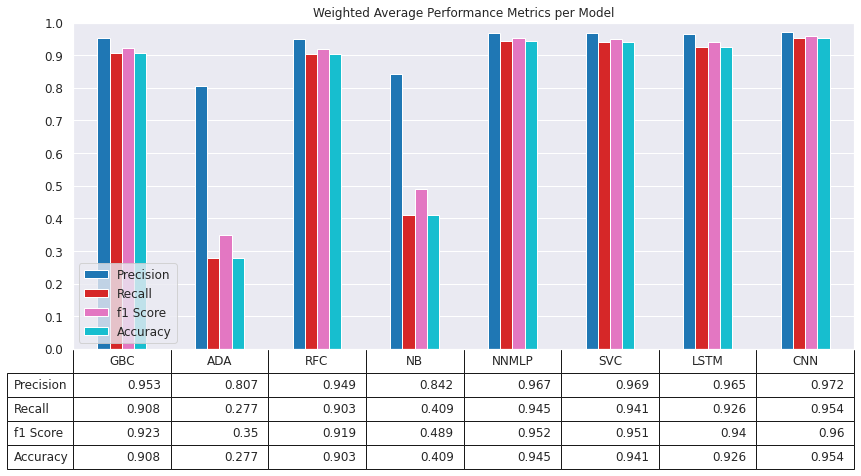

In [ ]:
accuracy =  round(all_results['Accuracy'].astype(float),3).to_numpy()
precision = round(all_results['Precision'].astype(float),3).to_numpy()
recall =    round(all_results['Recall'].astype(float),3).to_numpy()
f1_score =  round(all_results['F1score'].astype(float),3).to_numpy()
index = all_results['Model']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_res = pd.DataFrame({'Precision':precision,
                   'Recall':recall,
                   'f1 Score':f1_score,
                   'Accuracy':accuracy
                  },
                  index=index)
ax = df_res.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            table=True,
            title=('Weighted Average Performance Metrics per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=3, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

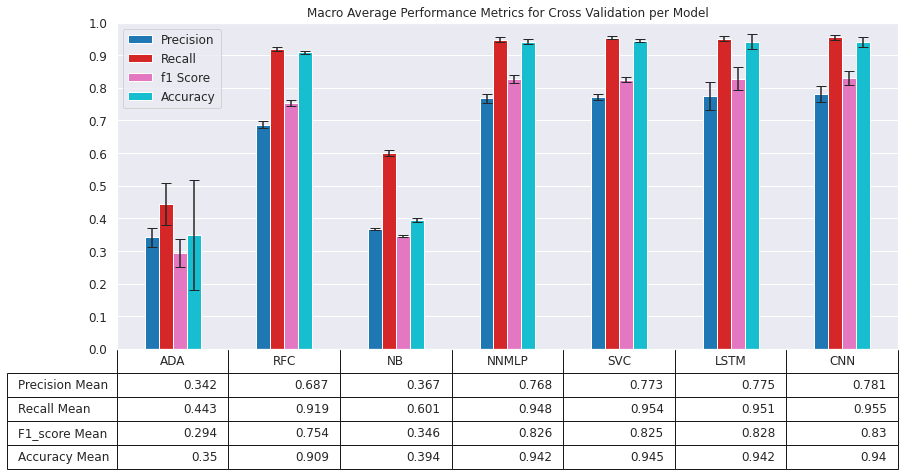

In [ ]:
accuracyM =  round(all_cv_results['Acc_Mean'].astype(float),3).to_numpy()
accuracyS =  round(all_cv_results['Acc_Std'].astype(float),3).to_numpy()

precisionM = round(all_cv_results['Pre_Mean'].astype(float),3).to_numpy()
precisionS = round(all_cv_results['Pre_Std'].astype(float),3).to_numpy()

recallM =    round(all_cv_results['Rec_Mean'].astype(float),3).to_numpy()
recallS =    round(all_cv_results['Rec_Std'].astype(float),3).to_numpy()

f1_scoreM =  round(all_cv_results['F1_Mean'].astype(float),3).to_numpy()
f1_scoreS =  round(all_cv_results['F1_Std'].astype(float),3).to_numpy()

index = all_cv_results['Model']
ticks = (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0)

df_cv = pd.DataFrame({'Precision Mean':precisionM,
                       'Recall Mean':recallM,
                       'F1_score Mean':f1_scoreM,
                       'Accuracy Mean':accuracyM,
                      # 'Precision Std':precisionS,
                      # 'Recall Std':recallS,                   
                      # 'F1_score Std':f1_scoreS,                   
                      # 'Accuracy Std':accuracyS
                       },index=index)

error = [precisionS,recallS,f1_scoreS,accuracyS]

ax = df_cv.plot.bar(figsize=(14,6),
            ylim=(0,1),
            yticks=(0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0),
            fontsize=(12),
            rot=0,
            yerr=error,
            capsize=5,
            table=True,
            title=('Macro Average Performance Metrics for Cross Validation per Model'),
            colormap='tab10')

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],["Precision", "Recall", "f1 Score", 'Accuracy'], loc=2, fontsize=12)
ax.axes.get_xaxis().set_visible(False)
# Getting the table created by pandas and matplotlib
table = ax.tables[0]
# Setting the font size
table.set_fontsize(12)
# Rescaling the rows to be more readable
table.scale(1,2)

In [ ]:
import researchpy as rp
rp.summary_cont(df_cv)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Precision Mean,7.0,0.6419,0.1990,0.0752,0.4578,0.8259
1,Recall Mean,7.0,0.8244,0.2119,0.0801,0.6284,1.0204
2,F1_score Mean,7.0,0.6719,0.2423,0.0916,0.4478,0.8960
3,Accuracy Mean,7.0,0.7746,0.2756,0.1042,0.5197,1.0294


In [ ]:
stack_df = df_cv.stack().reset_index()
stack_df = stack_df.rename(columns={'level_0': 'models',
                                    'level_1': 'metric',
                                    0:'score'},)
display(stack_df)

,Model,metric,score
0,ADA,Precision Mean,0.342
1,ADA,Recall Mean,0.443
2,ADA,F1_score Mean,0.294
3,ADA,Accuracy Mean,0.350
4,RFC,Precision Mean,0.687
5,RFC,Recall Mean,0.919
6,RFC,F1_score Mean,0.754
7,RFC,Accuracy Mean,0.909
8,NB,Precision Mean,0.367
9,NB,Recall Mean,0.601


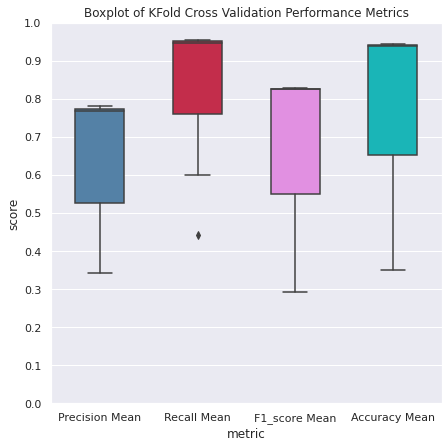

In [ ]:
plt.figure(figsize=(7,7))
mypal=('#4682B4','#DC143C','#EE82EE','#00CED1')
ax = sns.boxplot(y=stack_df["score"], x=stack_df["metric"],width=0.5, palette=mypal)
ax.set_title('Boxplot of KFold Cross Validation Performance Metrics')
ax.set_ylim(0.0,1.0)
ax.set_yticks(ticks=ticks,minor=False)

In [ ]:
import numpy as np
import scipy.stats as stats
# to check
# Confidence interval
confidence_level = 0.95
# If juste samples (not mean) the dof is 
mean_list, std_list, ci_list = [], [], []
for col_name  in df_cv:
    col_values = df_cv[col_name].values
    sample_size = len(col_values)
    degrees_freedom = sample_size - 1
    sample_mean = np.mean(col_values)
    # Standard error of the mean (SEM) = sigma / sqrt(n)
    sample_standard_error = stats.sem(col_values)
    print('sample_standard_error s^2=', sample_standard_error,
         'or s/np.sqrt(n_t)', np.std(col_values)/np.sqrt(sample_size),  np.std(col_values))
    confidence_interval = stats.t.interval(alpha=confidence_level,
                                           df=degrees_freedom,
                                           loc=sample_mean,
                                           scale=sample_standard_error)
    std_list.append(sample_standard_error)
    ci_list.append(confidence_interval)
    mean_list.append(sample_mean)
    
CI_df = pd.DataFrame([df_cv.columns.values, mean_list, std_list,  ci_list]).transpose()
CI_df.columns = ['metric',
                 'mean',
                 'std error',
                 'CI']
CI_df.loc[:,'CI'] =  CI_df.loc[:,'CI'].map(lambda x: (x[0].round(2), x[1].round(2)))
CI_df = CI_df.sort_values(by=['mean'])
display(CI_df)

sample_standard_error s^2= 0.07522930931220781 or s/np.sqrt(n_t) 0.06964880665324837 0.18427342151691606
sample_standard_error s^2= 0.08010108409671736 or s/np.sqrt(n_t) 0.0741591936703124 0.19620678388072194
sample_standard_error s^2= 0.09158769634863068 or s/np.sqrt(n_t) 0.08479373017142741 0.2243431227711112
sample_standard_error s^2= 0.10415690022243163 or s/np.sqrt(n_t) 0.09643055175593133 0.2551312587349372


,metric,mean,std error,CI
0,Precision Mean,0.641857,0.0752293,"(0.46, 0.83)"
2,F1_score Mean,0.671857,0.0915877,"(0.45, 0.9)"
3,Accuracy Mean,0.774571,0.104157,"(0.52, 1.03)"
1,Recall Mean,0.824429,0.0801011,"(0.63, 1.02)"


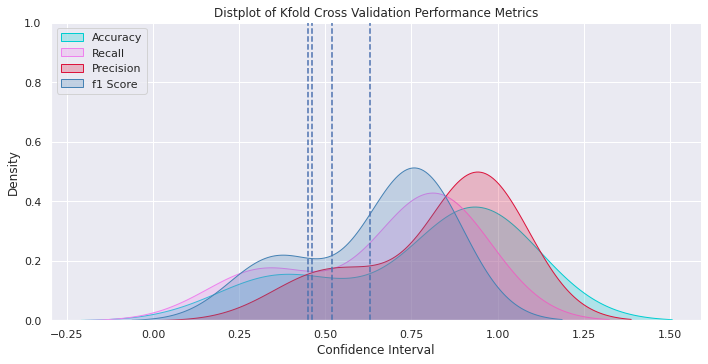

In [ ]:
mypal1=('#4682B4','#DC143C','#EE82EE','#00CED1')
graph = sns.displot(stack_df, x='score', hue='metric', kind="kde", fill=True,height=5,aspect=2,legend=False,palette=mypal1)
plt.title('Distplot of Kfold Cross Validation Performance Metrics')
plt.ylim(0,1)
plt.xlabel('Confidence Interval')
graph.ax.legend(labels=['Accuracy','Recall','Precision','f1 Score'],loc=2)
for CI in CI_df['CI'].values:
    plt.axvline(CI[0],  linestyle='--')
plt.show()

In [ ]:
ADA_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/ada_acc.csv') 
ADA_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/ada_pre.csv') 
ADA_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/ada_rec.csv') 
ADA_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/ada_f1s.csv') 

RFC_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/RFC_acc.csv') 
RFC_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/RFC_pre.csv') 
RFC_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/RFC_rec.csv') 
RFC_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/RFC_f1s.csv') 

NB_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/NB_acc.csv') 
NB_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/NB_pre.csv') 
NB_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/NB_rec.csv') 
NB_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/NB_f1s.csv') 

NNMLP_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/NNMLP_acc.csv') 
NNMLP_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/NNMLP_pre.csv') 
NNMLP_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/NNMLP_rec.csv') 
NNMLP_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/NNMLP_f1s.csv') 

SVC_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/SVC_acc.csv') 
SVC_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/SVC_pre.csv') 
SVC_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/SVC_rec.csv') 
SVC_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/SVC_f1s.csv') 

LSTM_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/LSTM_acc.csv') 
LSTM_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/LSTM_pre.csv') 
LSTM_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/LSTM_rec.csv') 
LSTM_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/LSTM_f1s.csv') 

CNN_acc = pd.read_csv('./drive/MyDrive/compsci/metric_results/CNN_acc.csv') 
CNN_pre = pd.read_csv('./drive/MyDrive/compsci/metric_results/CNN_pre.csv') 
CNN_rec = pd.read_csv('./drive/MyDrive/compsci/metric_results/CNN_rec.csv') 
CNN_f1s = pd.read_csv('./drive/MyDrive/compsci/metric_results/CNN_f1s.csv') 

In [ ]:
from scipy.stats import *
norm_data = [ADA_acc,ADA_pre,ADA_rec,ADA_f1s,
             RFC_acc,RFC_pre,RFC_rec,RFC_f1s,
             NB_acc,NB_pre,NB_rec,NB_f1s,
             NNMLP_acc,NNMLP_pre,NNMLP_rec,NNMLP_f1s,
             SVC_acc,SVC_pre,SVC_rec,SVC_f1s,
             LSTM_acc,LSTM_pre,LSTM_rec,LSTM_f1s,
             CNN_acc,CNN_pre,CNN_rec,CNN_f1s]

for i in norm_data:
  print(shapiro(i))

(0.8658868670463562, 0.08949096500873566)
(0.9411484599113464, 0.565862238407135)
(0.8079179525375366, 0.018091578036546707)
(0.9383097887039185, 0.5343644022941589)
(0.9546018242835999, 0.7230045199394226)
(0.959470808506012, 0.7798219323158264)
(0.911368727684021, 0.2905256450176239)
(0.9664827585220337, 0.856457531452179)
(0.9271536469459534, 0.4204859137535095)
(0.884261965751648, 0.14599885046482086)
(0.809455156326294, 0.018885374069213867)
(0.7054504752159119, 0.0010256500681862235)
(0.859650731086731, 0.07558832317590714)
(0.911046028137207, 0.2882539927959442)
(0.9571996927261353, 0.7535320520401001)
(0.8486508727073669, 0.05598006397485733)
(0.8867400884628296, 0.1557837426662445)
(0.8859767913818359, 0.1527070850133896)
(0.9419348239898682, 0.5747376084327698)
(0.9140843749046326, 0.3102412223815918)
(0.8191530108451843, 0.024751342833042145)
(0.9302350282669067, 0.45020827651023865)
(0.8957162499427795, 0.19647976756095886)
(0.9179718494415283, 0.3403497338294983)
(0.947988

In [ ]:
from scipy.stats import *

# Perform one-way ANOVA.

f_acc_stat, f_acc_p = f_oneway(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc)
f_pre_stat, f_pre_p = f_oneway(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre)
f_rec_stat, f_rec_p = f_oneway(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec)
f_f1s_stat, f_f1s_p = f_oneway(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s)

print('Accuracy: ', f_oneway(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc))
print('Precision: ', f_oneway(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre))
print('Recall: ', f_oneway(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec))
print('F1Score: ', f_oneway(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s))

Accuracy:  F_onewayResult(statistic=array([180.67321125]), pvalue=array([9.79255564e-38]))
Precision:  F_onewayResult(statistic=array([778.26545048]), pvalue=array([4.34733597e-57]))
Recall:  F_onewayResult(statistic=array([716.28396741]), pvalue=array([5.71274037e-56]))
F1Score:  F_onewayResult(statistic=array([1024.65379989]), pvalue=array([8.35845034e-61]))


In [ ]:
k_acc_stat, k_acc_p = kruskal(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc)
k_pre_stat, k_pre_p = kruskal(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre)
k_rec_stat, k_rec_p = kruskal(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec)
k_f1s_stat, k_f1s_p = kruskal(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s)

print('Accuracy: ', kruskal(ADA_acc,RFC_acc,NB_acc,NNMLP_acc,SVC_acc,LSTM_acc,CNN_acc))
print('Precision: ', kruskal(ADA_pre,RFC_pre,NB_pre,NNMLP_pre,SVC_pre,LSTM_pre,CNN_pre))
print('Recall: ', kruskal(ADA_rec,RFC_rec,NB_rec,NNMLP_rec,SVC_rec,LSTM_rec,CNN_rec))
print('F1Score: ', kruskal(ADA_f1s,RFC_f1s,NB_f1s,NNMLP_f1s,SVC_f1s,LSTM_f1s,CNN_f1s))

Accuracy:  KruskalResult(statistic=53.47415488521833, pvalue=9.416517959815747e-10)
Precision:  KruskalResult(statistic=55.07058350100601, pvalue=4.485825813693248e-10)
Recall:  KruskalResult(statistic=57.86704225352116, pvalue=1.2192744550639287e-10)
F1Score:  KruskalResult(statistic=54.81513078470823, pvalue=5.051512768050641e-10)


In [ ]:
!pip install scikit-posthocs

In [ ]:
from scikit_posthocs import posthoc_wilcoxon

acc_data = [ADA_acc.to_numpy(),RFC_acc.to_numpy(),NB_acc.to_numpy(),NNMLP_acc.to_numpy(),SVC_acc.to_numpy(),LSTM_acc.to_numpy(),CNN_acc.to_numpy()]

pre_data = [ADA_pre.to_numpy(),RFC_pre.to_numpy(),NB_pre.to_numpy(),NNMLP_pre.to_numpy(),SVC_pre.to_numpy(),LSTM_pre.to_numpy(),CNN_pre.to_numpy()]

rec_data = [ADA_rec.to_numpy(),RFC_rec.to_numpy(),NB_rec.to_numpy(),NNMLP_rec.to_numpy(),SVC_rec.to_numpy(),LSTM_rec.to_numpy(),CNN_rec.to_numpy()]

f1s_data = [ADA_f1s.to_numpy(),RFC_f1s.to_numpy(),NB_f1s.to_numpy(),NNMLP_f1s.to_numpy(),SVC_f1s.to_numpy(),LSTM_f1s.to_numpy(),CNN_f1s.to_numpy()]

In [ ]:
acc_pair_wilcox = posthoc_wilcoxon(acc_data, p_adjust='bonferroni')
pre_pair_wilcox = posthoc_wilcoxon(pre_data, p_adjust='bonferroni')
rec_pair_wilcox = posthoc_wilcoxon(rec_data, p_adjust='bonferroni')
f1s_pair_wilcox = posthoc_wilcoxon(f1s_data, p_adjust='bonferroni')

print('Accuracy:\n',acc_pair_wilcox)
print('Precision:\n',pre_pair_wilcox)
print('Recall:\n',rec_pair_wilcox)
print('F1Score:\n',f1s_pair_wilcox)

Accuracy:
           1         2         3         4         5         6         7
1  1.000000  0.106303  1.000000  0.106303  0.106303  0.106303  0.106303
2  0.106303  1.000000  0.106303  0.106303  0.106303  0.262822  0.106303
3  1.000000  0.106303  1.000000  0.106303  0.106303  0.106303  0.106303
4  0.106303  0.106303  0.106303  1.000000  1.000000  1.000000  1.000000
5  0.106303  0.106303  0.106303  1.000000  1.000000  1.000000  1.000000
6  0.106303  0.262822  0.106303  1.000000  1.000000  1.000000  1.000000
7  0.106303  0.106303  0.106303  1.000000  1.000000  1.000000  1.000000
Precision:
           1         2         3         4         5         6         7
1  1.000000  0.106303  0.348702  0.106303  0.106303  0.106303  0.106303
2  0.106303  1.000000  0.106303  0.106303  0.106303  0.145119  0.106303
3  0.348702  0.106303  1.000000  0.106303  0.106303  0.106303  0.106303
4  0.106303  0.106303  0.106303  1.000000  1.000000  1.000000  1.000000
5  0.106303  0.106303  0.106303  1.000000

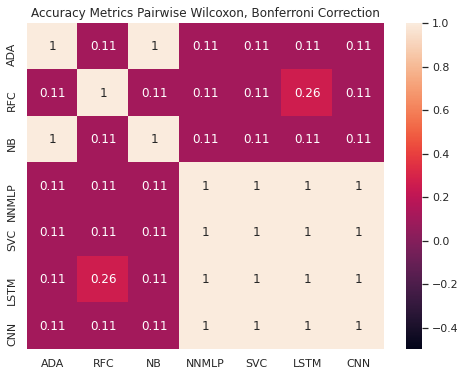

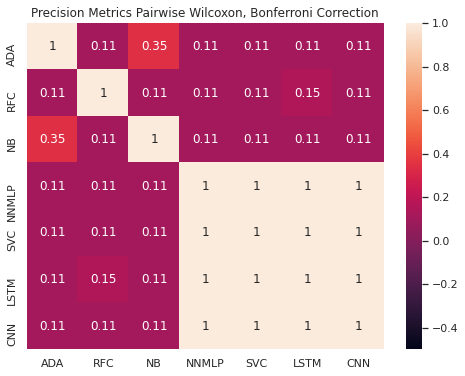

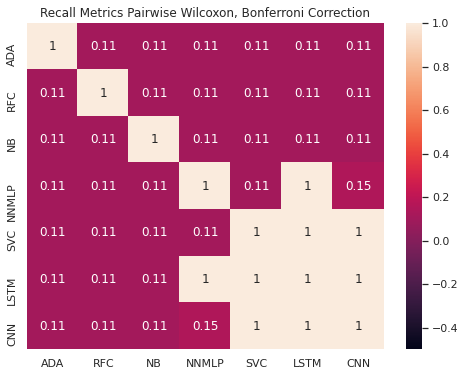

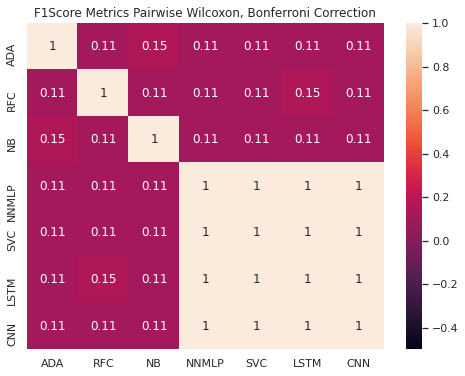

In [ ]:
categories = ['ADA','RFC','NB','NNMLP','SVC','LSTM','CNN']
rcParams['figure.figsize'] = 8,6
sns.heatmap(acc_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Accuracy Metrics Pairwise Wilcoxon, Bonferroni Correction')
plt.show()
sns.heatmap(pre_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Precision Metrics Pairwise Wilcoxon, Bonferroni Correction')
plt.show()
sns.heatmap(rec_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Recall Metrics Pairwise Wilcoxon, Bonferroni Correction')
plt.show()
sns.heatmap(f1s_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('F1Score Metrics Pairwise Wilcoxon, Bonferroni Correction')
plt.show()

In [ ]:
acc_pair_wilcox = posthoc_wilcoxon(acc_data)
pre_pair_wilcox = posthoc_wilcoxon(pre_data)
rec_pair_wilcox = posthoc_wilcoxon(rec_data)
f1s_pair_wilcox = posthoc_wilcoxon(f1s_data)

print('Accuracy:\n',acc_pair_wilcox)
print('Precision:\n',pre_pair_wilcox)
print('Recall:\n',rec_pair_wilcox)
print('F1Score:\n',f1s_pair_wilcox)

Accuracy:
           1         2         3         4         5         6         7
1  1.000000  0.005062  0.332880  0.005062  0.005062  0.005062  0.005062
2  0.005062  1.000000  0.005062  0.005062  0.005062  0.012515  0.005062
3  0.332880  0.005062  1.000000  0.005062  0.005062  0.005062  0.005062
4  0.005062  0.005062  0.005062  1.000000  0.444587  0.575062  0.798859
5  0.005062  0.005062  0.005062  0.444587  1.000000  0.878482  0.386271
6  0.005062  0.012515  0.005062  0.575062  0.878482  1.000000  0.721277
7  0.005062  0.005062  0.005062  0.798859  0.386271  0.721277  1.000000
Precision:
           1         2         3         4         5         6         7
1  1.000000  0.005062  0.016605  0.005062  0.005062  0.005062  0.005062
2  0.005062  1.000000  0.005062  0.005062  0.005062  0.006910  0.005062
3  0.016605  0.005062  1.000000  0.005062  0.005062  0.005062  0.005062
4  0.005062  0.005062  0.005062  1.000000  0.444587  0.386271  0.386271
5  0.005062  0.005062  0.005062  0.444587

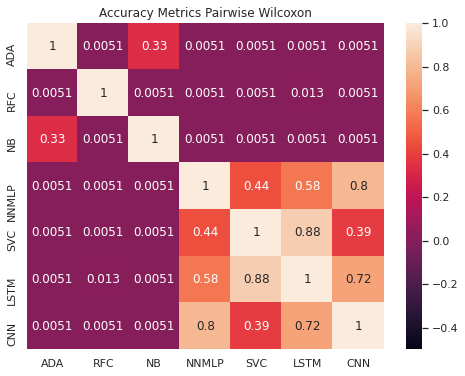

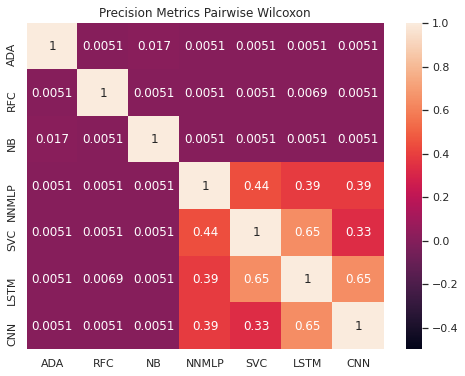

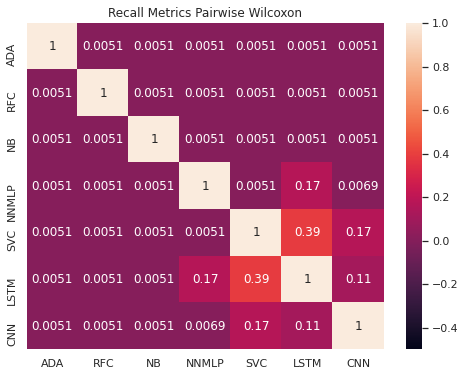

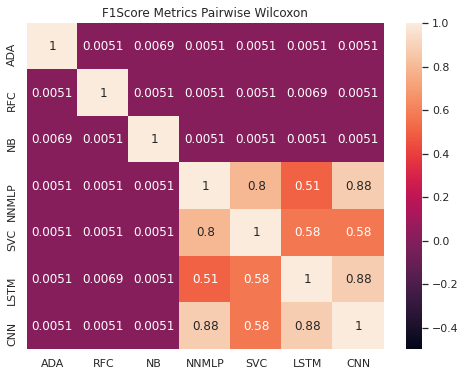

In [ ]:
categories = ['ADA','RFC','NB','NNMLP','SVC','LSTM','CNN']
rcParams['figure.figsize'] = 8,6
sns.heatmap(acc_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Accuracy Metrics Pairwise Wilcoxon')
plt.show()
sns.heatmap(pre_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Precision Metrics Pairwise Wilcoxon')
plt.show()
sns.heatmap(rec_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('Recall Metrics Pairwise Wilcoxon')
plt.show()
sns.heatmap(f1s_pair_wilcox, annot=True, fmt='.2g' , xticklabels=categories,yticklabels=categories, vmin=-0.5, vmax=1)
plt.title('F1Score Metrics Pairwise Wilcoxon')
plt.show()